In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Integration with Python - Introduction

We will practice first by defining an integral we can solve easily by hand. We will then compare the numerical integration results to the true value. Later we will use these numerical techniques to solve integrals which can not be solved analytically.

Lets use the same function defined in the book:

Define $f(x) = x^4-2x +1$

Note $\int_0^2 (x^4-2x +1) dx = (\frac{x^5}{5} - x^2 + x) \big|_0^2 = 32/5 - 4 + 2 = 4.4 $

In [33]:
def f(x):
    return x**4 - 2*x +1

In [34]:
integral_true = 4.4

In [35]:
# Define parameters for numerical integration
N = 10  # Number of slices
a = 0.0 # Lower bound
b = 2.0 # Upper bound
w = (b-a)/N # Step size
print("Step size ",w)

Step size  0.2


[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]


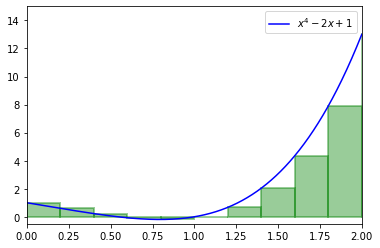

In [36]:
# Visualize numerical integration using rectangles
ax = plt.axes(xlim=(a, b), ylim = (-0.5, 15)) 

# Plot the function
x = np.linspace(a, b, 1000) # Use many points so it is smooth
y = f(x)  
ax.plot(x, y, c='blue', label='$x^4 -2x+1$') 
ax.legend()

# Plot the rectangles
x = np.linspace(a, b, N + 1) 
print(x)
y = f(x)      
bar = ax.bar(x, y, width=w, alpha=0.4, align='edge', color='green', edgecolor='green', lw=2)

In [37]:
# Integrating a function
#   with rectangular slices (Left Riemann sum)

N = 10  # Number of slices
a = 0.0 # Lower bound
b = 2.0 # Upper bound
w = (b-a)/N # Step size
print("Step size ",w)

# Create an array entry for each step 
x = np.linspace(a, b, N, endpoint = False)
print("Step locations",x)

# Calculate numerical integral
s=0 
for k in x:
    s+= f(k)*w
print("Integral =",s)

Step size  0.2
Step locations [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
Integral = 3.306560000000001


In [38]:
# Define the same integral estimator as a function
def rectangular_integral_left(N,a,b): 
    # Step size
    w = (b-a)/N 

    # Create an array entry for each step 
    x = np.linspace(a, b, N, endpoint = False)

    # Calculate numerical integral
    s=0 
    for k in x:
        s+= f(k)*w
    return s

With  1000  iterations we found I =  4.3880106666656


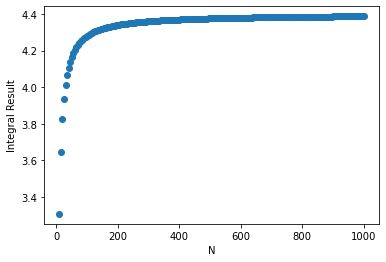

In [39]:
# Check how the integral result changes with increasing N
N_array = np.arange(10,1005,5,dtype='int64')
integral_results_rect_left = []
for N in N_array:
    integral_results_rect_left.append(rectangular_integral_left(N,a,b))

plt.plot(N_array,integral_results_rect_left,"o")
plt.xlabel("N")
plt.ylabel("Integral Result")

print("With ",N_array[-1]," iterations we found I = ",integral_results_rect_left[-1])

In [40]:
# Integrating a function
#   with rectangular slices (Midpoint Riemann sum)

N = 10  # Number of slices
a = 0.0 # Lower bound
b = 2.0 # Upper bound
w = (b-a)/N # Step size
print("Step size ",w)

# Create an array entry for each step 
x = np.linspace(a+w/2, b+w/2, N, endpoint = False)
print("Step locations",x)

# Calculate numerical integral
s=0 
for k in x:
    s+= f(k)*w
print("Integral =",s)

Step size  0.2
Step locations [0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9]
Integral = 4.346760000000002


In [41]:
# Now lets do the same but with a function
def rectangular_integral_midpoint(N,a,b):

    # Step size
    w = (b-a)/N 

    # Create an array entry for each step 
    x = np.linspace(a+w/2, b+w/2, N, endpoint = False)

    # Calculate numerical integral
    s=0 
    for k in x:
        s+= f(k)*w
    return s

With  1000  iterations we found I =  4.399994666667596


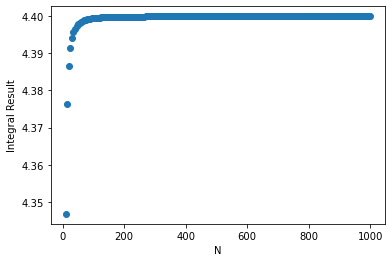

In [42]:
# Check how the integral result changes with increasing N
N_array = np.arange(10,1005,5,dtype='int64')
integral_results_rect_mid = []
for N in N_array:
    integral_results_rect_mid.append(rectangular_integral_midpoint(N,a,b))

plt.plot(N_array,integral_results_rect_mid,"o")
plt.xlabel("N")
plt.ylabel("Integral Result")

print("With ",N_array[-1]," iterations we found I = ",integral_results_rect_mid[-1])

In [43]:
# Now lets do the same but with a function
def rectangular_integral_right(N,a,b):

    # Step size
    w = (b-a)/N 

    # Create an array entry for each step 
    x = np.linspace(a+w, b+w, N, endpoint = False)

    # Calculate numerical integral
    s=0 
    for k in x:
        s+= f(k)*w
    return s

With  1000  iterations we found I =  4.412010666665594


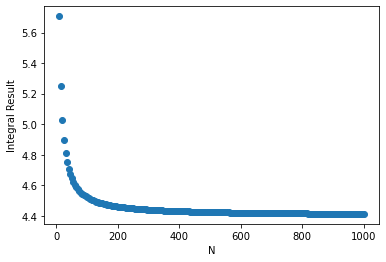

In [44]:
# Check how the integral result changes with increasing N
N_array = np.arange(10,1005,5,dtype='int64')
integral_results_rect_right = []
for N in N_array:
    integral_results_rect_right.append(rectangular_integral_right(N,a,b))

plt.plot(N_array,integral_results_rect_right,"o")
plt.xlabel("N")
plt.ylabel("Integral Result")

print("With ",N_array[-1]," iterations we found I = ",integral_results_rect_right[-1])

Text(0, 0.5, 'Integral Result')

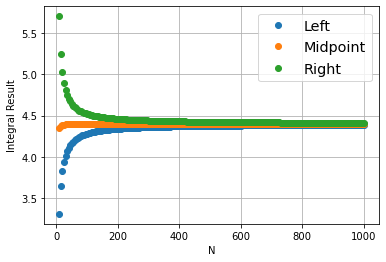

In [45]:
plt.plot(N_array,integral_results_rect_left,"o",label="Left")
plt.plot(N_array,integral_results_rect_mid,"o",label="Midpoint")
plt.plot(N_array,integral_results_rect_right,"o",label="Right")
plt.grid(True)
plt.legend(loc='upper right', fontsize='x-large')
plt.xlabel("N")
plt.ylabel("Integral Result")

(4.3, 4.5)

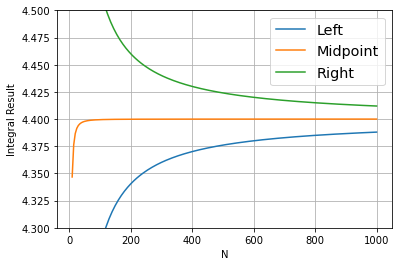

In [46]:
plt.plot(N_array,integral_results_rect_left,"-",label="Left")
plt.plot(N_array,integral_results_rect_mid,"-",label="Midpoint")
plt.plot(N_array,integral_results_rect_right,"-",label="Right")
plt.grid(True)
plt.legend(loc='upper right', fontsize='x-large')
plt.xlabel("N")
plt.ylabel("Integral Result")
plt.ylim(4.3,4.5)

In [47]:
# Integrating a function
#   with the Extended Trapezoid Rule

N = 10  # Number of slices
a = 0.0 # Lower bound
b = 2.0 # Upper bound
w = (b-a)/N # Step size
print("Step size ",w)



# Calculate numerical integral
#   using the trapezoid rule for each slice
x = np.arange(1, N+1)
print("Steps",x)
t = 0 
for k in x:
    t+= 0.5*w*(f(a+k*w-w)+f(a+k*w))
    print("LB",a+k*w-w,"UB",a+k*w, "Slice Area",0.5*w*(f(a+k*w-w)+f(a+k*w)) )

# Calculate numerical integral
#   using the extended trapezoid rule 
x = np.arange(1, N)
print("Steps",x)  
s = 0.5*f(a) + 0.5*f(b)
for k in x:
    s+= f(a+k*w)
s = w*s

print("Integrals =",s,t)

Step size  0.2
Steps [ 1  2  3  4  5  6  7  8  9 10]
LB 0.0 UB 0.2 Slice Area 0.16016
LB 0.2 UB 0.4 Slice Area 0.08271999999999999
LB 0.4000000000000001 UB 0.6000000000000001 Slice Area 0.01551999999999999
LB 0.6000000000000001 UB 0.8 Slice Area -0.026079999999999992
LB 0.8 UB 1.0 Slice Area -0.01903999999999999
LB 1.0000000000000002 UB 1.2000000000000002 Slice Area 0.06736000000000013
LB 1.2000000000000002 UB 1.4000000000000001 Slice Area 0.2715200000000002
LB 1.4000000000000001 UB 1.6 Slice Area 0.6395200000000003
LB 1.6 UB 1.8 Slice Area 1.2251200000000002
LB 1.8 UB 2.0 Slice Area 2.08976
Steps [1 2 3 4 5 6 7 8 9]
Integrals = 4.50656 4.506560000000001


<font color=magenta>----Begin Exercise 11-1----</font> 

* Repeat the steps we did above for other algorithms
    * Define a function which calculates the integral of a function using the extended trapezoid rule. The inputs to the function should be N, a, and b.
    * Plot the value of the integral as a function of N (for all N from 10 to 1000 in steps of 5)
    * Make a plot comparing all 4 methods
* For the midpoint rule and trapzoid rule, calculate the percent error for each value of N (create a percent error array). 
    * $\text{percent error} = 100\% \times\frac{(\text{Calculated value} - \text{true value})}{\text{true value}}$
* Make a plot comparing the percent error for the midpoint rule and trapzoid rule

_<font color=magenta>----End Exercise----</font> _